# Augmented dataset analysis

We analyze our augmented dataset and compare it to the original geolife slice we used

In [1]:
import yaml

with open("../conf.yaml") as f:
    conf = yaml.load(f, Loader = yaml.FullLoader)

out_path = conf["out_path"]
data_path = conf["data_path"]

We start by defining some helper functions and importing some modules.

In [2]:
import pandas as pd
import skmob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns


#helper functions to plot and save figures with pyplot
def plot_df(x, y, name, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:blue', marker="o")
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid()
    plt.savefig(out_path + name)
    plt.show()

def plot_df_comparison(x1, y1, x2, y2, name, title, legend, xlabel="date", ylabel="Value", dpi = 100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x1, y1, color='tab:blue', marker="o")
    plt.plot(x2, y2, color='tab:red', marker="x")
    plt.legend(legend)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.grid()
    plt.savefig(out_path + name)
    plt.show
    
def plot_bar_comparison(users_orig, users_aug, trajs_orig, trajs_aug):
        
    n_groups = 2    
    values_original = (users_orig, trajs_orig)
    values_augmented = (users_aug, trajs_aug)
    
    # create plot
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8
    
    rects1 = plt.bar(index, values_original, bar_width,
    alpha=opacity,
    color='tab:blue',
    label='Original')

    rects2 = plt.bar(index + bar_width, values_augmented, bar_width,
    alpha=opacity,
    color='tab:red',
    label='Augmented')
    
    plt.xlabel('Attribute')
    plt.ylabel('Quantity')
    plt.yscale("log")
    plt.title('Unique users and trajectories comparison')
    plt.xticks(index + bar_width, ("Users", "Trajectories"))
    plt.legend()

    #plt.tight_layout()
    plt.savefig(out_path + "bar_comparison_orig_vs_aug.png")
    plt.show()


/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/statsmodels-0.10.0rc2-py3.7-macosx-10.9-x86_64.egg/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We retrieve our datasets from disk

In [ ]:
cols = ["date_time", "lat", "lon", "tid", "uid"]
cols_aug = ["lat", "lon", "uid", "tid","date_time"]

#restricting to june - august 2008
start_time = "2008-06-01 00:00:00"
end_time = "2008-08-31 23:59:00"

df = pd.read_csv(data_path + "complete_with_tids.csv", \
                 usecols = cols, parse_dates = True, infer_datetime_format = True)
original = (df[(df.date_time > start_time) & (df.date_time < end_time)]).copy()
augmented = pd.read_csv(data_path + "augmented_dataset.csv", usecols=cols_aug, parse_dates = True)

In [ ]:
print(augmented)
print(augmented.info())
print(augmented.uid.nunique())
print(original.uid.nunique())
print(original.tid.max())
print(augmented.tid.max())

In [ ]:
augmented["date_time"] = pd.to_datetime(augmented["date_time"])
original["date_time"] = pd.to_datetime(original["date_time"])

print(augmented.info())
print(original.info())

# Useful stats
We plot some useful stats on our augmented dataset

In [ ]:
aug_uid = augmented['uid'].nunique()
orig_uid = original['uid'].nunique()

print(str(aug_uid) + " unique users for june 2008 (augmented dataset)")
print(str(orig_uid) + " unique users for june 2008 (original dataset)")

aug_tid = augmented['tid'].nunique()
orig_tid = original['tid'].nunique()

print(str(aug_tid) + " unique tids for june 2008 (augmented dataset)")
print(str(orig_tid) + " unique tids for june 2008 (original dataset)")

avg_pts = len(augmented)/aug_uid
print("average points per user in the augmented dataset: {:f}, on a total of {:d} points".format(avg_pts, len(augmented)))

In [ ]:
augmented.set_index('date_time', inplace=True)
original.set_index('date_time', inplace=True)

# Bar comparison
We plot a bar comparison using a logarithmic scale to show how we augmented our dataset.

In [ ]:
#bar comparison for number of users and trajectories
plot_bar_comparison(orig_uid, aug_uid, orig_tid, aug_tid)

In [ ]:
#daily - original

original_daily = original.groupby(pd.Grouper(freq='D')).size()
plot_df(x=original_daily.index, y=original_daily, name="original_daily_linear.png",\
       title="Number of gps points per day in our period (original dataset)" )

In [ ]:
#daily - augmented

augmented_daily = augmented.groupby(pd.Grouper(freq='D')).size()
plot_df(x=augmented_daily.index, y=augmented_daily, name="augmented_daily_linear.png",\
       title="Number of gps points per day in our period (augmented dataset)" )

# Linear graphs
We plot a linear graph for both daily and weekly aggregations

In [ ]:
#daily - comparison

plot_df_comparison(x1 = original_daily.index, y1 = original_daily,\
               x2 = augmented_daily.index, y2 = augmented_daily, name = "augmented_vs_original_daily.png",\
                  title="Dailiy comparison between the original and augmented datasets", legend = ["Original", "Augmented"])

In [ ]:
#weekly - original
original_weekly = original.groupby(pd.Grouper(freq='W')).size()
plot_df(x=original_weekly.index, y=original_weekly, name="original_weekly_linear.png",\
       title="Number of gps points per week in our period (original dataset)" )

In [ ]:
#weekly - augmented
augmented_weekly = augmented.groupby(pd.Grouper(freq='W')).size()
plot_df(x=augmented_weekly.index, y=augmented_weekly, name="augmented_weekly_linear.png",\
       title="Number of gps points per week in our period (augmented dataset)" )

In [ ]:
#weekly - comparison

plot_df_comparison(x1 = original_weekly.index, y1 = original_weekly,\
               x2 = augmented_weekly.index, y2 = augmented_weekly, name = "augmented_vs_original_weekly.png",\
                  title="Weekly comparison between the original and augmented dataset", legend = ["Original", "Augmented"])

##### We load the augmented dataset again, start here if you just want the graphs below and wanna spare some Ram

In [ ]:
cols_aug = ["lat", "lon", "uid", "tid","date_time"]

augmented = pd.read_csv(data_path + "augmented_dataset.csv", usecols=cols_aug, parse_dates = True)

### Gps points per week
a little bit strange since June 1 2008 was a Sunday and ISO weeks start on monday

In [ ]:
week = augmented
week["week"] = week.index.week
week["day"] = week.index.weekday
week = week.groupby(["day", "week"]).size()

sns.set(style = "ticks", font_scale = 1.45)
fig = plt.figure(figsize = (15, 8))
week = week.T
week = week.unstack(level=-1)
#week = week.pivot("day", "week")

#print(week)

plt.title("GPS points per week in our augmented dataset", fontsize = 14)
img = sns.heatmap(week, robust = True, cmap="Reds",linewidths =0.3,square = False, cbar= True, cbar_kws={"orientation": "horizontal"})
plt.savefig(out_path + "gps_points_per_week_augmented.jpg")

### Visits per time unit
(on a weekly basis)

In [ ]:
import skmob
import datetime
from skmob.measures.collective import visits_per_time_unit

#print(augmented.reset_index())

tdf = skmob.TrajDataFrame(augmented.reset_index(), longitude = "lon", datetime = "date_time").sort_values(by='datetime')
vtu_df = visits_per_time_unit(tdf, time_unit = "W")
print(vtu_df)

We need to get the number of users per week in order to plot a meaningful heatmap

In [ ]:
users = augmented
users["week"] = users.index.week
users["day"] = users.index.weekday
users = users.groupby(["day", "week"])["uid"].nunique()

users = users.T
users = users.unstack(level=-1)

print(users)

Now we plot the number of visits per week along with a heatmap of active users

In [ ]:
import matplotlib.gridspec as gridspec
sns.set(style="whitegrid",font_scale=1.4)
fontsize = 10

fig = plt.figure(constrained_layout=False,figsize=(13, 5))
gs = gridspec.GridSpec(2, 4, figure=fig)

ax1=fig.add_subplot(gs[0, 0:4])
ax1.plot(vtu_df.n_visits, marker='o', color="r")
plt.yticks(size=fontsize, rotation=30)
ax1.set_xticks([])
ax1.set_ylabel("number of visits")
plt.grid(alpha=0.2,color="black") 
ax2=fig.add_subplot(gs[1, 0:4])


sns.heatmap(users, robust = True, cmap="Reds",linewidths =0.3,square = False, cbar= False, cbar_kws={"orientation": "horizontal"})

ax2.set_yticklabels(["Mon","Tue","Wed","Thu","Fry","Sat","Sun"])
plt.yticks(size=fontsize, rotation=30)

ax2.set_xlabel('weeks', fontsize=fontsize)
ax2.set_ylabel("active users")
plt.savefig(out_path + "visits_week_active_users.jpg")
#savefig("../output/Visits_week.png", dpi  = 300)

### Individual radius of gyration

In [ ]:
from skmob.measures.individual import radius_of_gyration

tdf = skmob.TrajDataFrame(augmented.reset_index(), longitude = "lon", user_id = "uid", datetime = "date_time")
rg_df = radius_of_gyration(tdf)

print(rg_df.head())

### Individual number of visits

In [ ]:
from skmob.measures.individual import number_of_visits

tdf = skmob.TrajDataFrame(augmented.reset_index(), longitude = "lon", user_id = "uid", datetime = "date_time")
num_v_df = number_of_visits(tdf)

print(num_v_df.head())

#### Plotting together radius of gyration and number of visits PDFs

/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  after removing the cwd from sys.path.


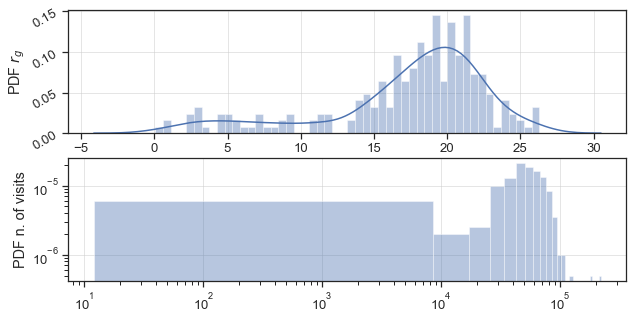

In [9]:
# Radius of gyration + pdf visits
from skmob.measures.collective import visits_per_location
from skmob.measures.individual import radius_of_gyration
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import matplotlib.gridspec as gridspec


sns.set(style="ticks",font_scale=1.2)

fontsize = 10
fig = plt.figure(constrained_layout=False,figsize=(10, 5))
gs = gridspec.GridSpec(2, 1, figure=fig)

ax1=fig.add_subplot(gs[0,0:])
plt.grid(alpha=0.5) 
sns.distplot(rg_df["radius_of_gyration"],bins=50,kde=True,ax=ax1,norm_hist=True)
plt.yticks(rotation=30)
#axins2 = inset_axes(ax1, width="30%", height="40%", loc=1, borderpad = 1)
#sns.distplot(rg_df["radius_of_gyration"],bins=50,kde=True,ax=axins2,norm_hist=True)
#axins2.set_xlim(15,25)
ax1.set_ylabel("PDF $r_g$")
ax1.set_xlim(xmin=0)

#axins2.set_xlabel("")

# PDF visits per location
ax2=fig.add_subplot(gs[1,0:])
#plt.hist(visit_loc.n_visits, cumulative=True)
sns.distplot(num_v_df.number_of_visits,ax=ax2,kde=False,norm_hist=True)
plt.grid(alpha=0.5) 
ax2.set_ylabel("PDF n. of visits")
plt.loglog()
ax2.set_xlabel("")

plt.savefig(out_path + "Radius_PDF_visits.png", dpi  = 300)


### Frequency and recency

- #### Frequency

In [5]:
from skmob.measures.individual import frequency_rank

tdf = skmob.TrajDataFrame(augmented.reset_index(), longitude = "lon", user_id = "uid", datetime = "date_time")
fr_df = frequency_rank(tdf)

print(fr_df.info())

/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 237/237 [00:16<00:00, 14.03it/s]


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12203649 entries, (10, 0) to (3099, 48937)
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   lat             float64
 1   lng             float64
 2   frequency_rank  int64  
dtypes: float64(2), int64(1)
memory usage: 350.7 MB
None


- #### Recency

In [7]:
from skmob.measures.individual import recency_rank

tdf = skmob.TrajDataFrame(augmented.reset_index(), longitude = "lon", user_id = "uid", datetime = "date_time")
rr_df = recency_rank(tdf)

print(rr_df.info())

100%|██████████| 237/237 [00:13<00:00, 17.36it/s]


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12203649 entries, (10, 12511233) to (3099, 5783713)
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   lat           float64
 1   lng           float64
 2   recency_rank  int64  
dtypes: float64(2), int64(1)
memory usage: 442.3 MB
None


#### Frequency and Recency joint plot

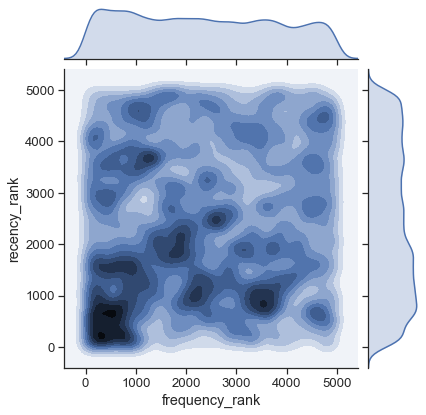

In [8]:
sns.set(style="ticks",font_scale=1.2)

n_rows = 1000000

merged_df = pd.merge(fr_df, rr_df, on=['uid', 'lat', 'lng'])
short_merged_df = merged_df[(merged_df.frequency_rank <= 5000) & (merged_df.recency_rank <= 5000)]

sns.jointplot(short_merged_df.frequency_rank, short_merged_df.recency_rank, kind="kde")

plt.savefig(out_path + "rec_vs_fre_augmented.png", dpi  = 300,bbox_inches = 'tight')
#savefig("../output/Rec_vs_Fre_kde.png", dpi  = 300,bbox_inches = 'tight')

#### Some more visualization
We visualize some of the trajectories and plot a datashader heatmap of the augmented dataset

In [15]:
#print(trajs)

tdf = skmob.TrajDataFrame(augmented[(augmented["uid"] == 1004)].reset_index(), longitude = "lon", datetime = "date_time")
print(tdf)


tdf.plot_trajectory(zoom=12, weight=3, opacity=0.9, tiles='Stamen Toner')

         index        lat         lng   uid    tid                   datetime
0      7661000  40.084160  116.307185  1004  76380 2008-06-01 13:20:51.000000
1      7661001  40.084117  116.307206  1004  76380 2008-06-01 13:20:51.422420
2      7661002  40.084075  116.307226  1004  76380 2008-06-01 13:20:51.844839
3      7661003  40.084033  116.307246  1004  76380 2008-06-01 13:20:52.267259
4      7661004  40.083991  116.307267  1004  76380 2008-06-01 13:20:52.689679
...        ...        ...         ...   ...    ...                        ...
30877  7691877  40.004708  116.300397  1004  76387 2008-06-04 19:53:01.459397
30878  7691878  40.004749  116.300422  1004  76387 2008-06-04 19:53:01.867576
30879  7691879  40.004790  116.300447  1004  76387 2008-06-04 19:53:02.275755
30880  7691880  40.004830  116.300471  1004  76387 2008-06-04 19:53:02.683934
30881  7691881  40.004862  116.300490  1004  76387 2008-06-04 19:53:02.999660

[30882 rows x 6 columns]


/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/scikit_mobility-1.0-py3.7.egg/skmob/utils/plot.py:143: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/scikit_mobility-1.0-py3.7.egg/skmob/utils/plot.py:152: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


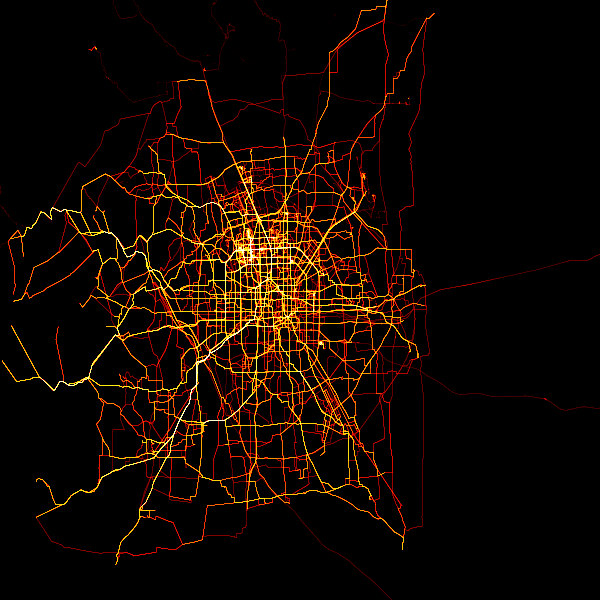

In [10]:
## import datashader as ds
from colorcet import fire
from datashader import transfer_functions as tf
import datashader as ds

from datashader.utils import lnglat_to_meters as webm

#df_
#augmented_t = augmented[(augmented['lat'].between(39, 41.5)) & (augmented['lon'].between(115, 117.5))]
df1 = augmented.copy(deep=True)


df1.loc[:, 'x'], df1.loc[:, 'y'] = webm(augmented.lon,augmented.lat)

#print(df1.head())
#print(df1.info())

"""plot_width = 1000
plot_height = 1000
"""
agg = ds.Canvas().points(df1, 'x', 'y')
img = tf.set_background(tf.shade(agg, cmap=fire),"black")
ds.utils.export_image(img=img,filename= out_path + 'beijing_dshader_augmented', fmt=".png", background="black")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
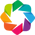

:DynamicMap   []
   :Overlay
      .Tiles.I :Tiles   [x,y]
      .RGB.I   :RGB   [x,y]   (R,G,B,A)

In [22]:
import holoviews as hv
from holoviews.element.tiles import EsriImagery
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

map_tiles  = EsriImagery().opts(alpha=0.5, width=800, height=800, bgcolor='black')
points     = hv.Points(df1, ['x', 'y'])
tracks = datashade(points, x_sampling=1, y_sampling=1, cmap=fire, width=600, height=600)


view = map_tiles * tracks
hv.save(view, out_path + "beijing_holoview.png", fmt="auto")
view